In [115]:
import tensorflow as tf

import pandas as pd
import numpy as np
import scipy as sp

import seaborn as sns
import matplotlib.pyplot as plt

In [116]:
df = pd.read_csv(r'data\db1.csv')

In [117]:
df.head(2)['event_datetime']

0    43:32.0
1    43:31.8
Name: event_datetime, dtype: object

In [118]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1000.0,5.122290e+02,3.666982e+02,1.000000e+00,2.507500e+02,5.005000e+02,7.502500e+02,5.396000e+03
object_id,1000.0,5.750716e+03,3.361627e+03,3.000000e+01,3.390250e+03,5.108000e+03,8.127750e+03,1.201300e+04
msg_event_time,1000.0,1.755070e+12,4.469897e+05,1.755070e+12,1.755070e+12,1.755070e+12,1.755070e+12,1.755080e+12
ai_timestamp,1000.0,1.755070e+12,4.469897e+05,1.755070e+12,1.755070e+12,1.755070e+12,1.755070e+12,1.755080e+12
faces_count,1000.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
face_age_prob,1000.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
face_age_value,1000.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
face_bot_position,1000.0,1.325517e+03,5.444099e+02,5.500000e+01,9.837500e+02,1.232500e+03,1.638250e+03,2.559000e+03
face_detect_confidence,1000.0,6.999090e-01,8.458286e-02,5.085027e-01,6.437824e-01,7.161175e-01,7.703688e-01,8.680212e-01
face_gender_prob,1000.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1000 non-null   int64  
 1   pod_name                1000 non-null   object 
 2   log_timestamp           1000 non-null   object 
 3   log_level               1000 non-null   object 
 4   log_name                1000 non-null   object 
 5   period                  1000 non-null   object 
 6   source_timestamp        1000 non-null   object 
 7   device_id               1000 non-null   object 
 8   object_id               1000 non-null   int64  
 9   event_id                1000 non-null   object 
 10  msg_user_ids            1000 non-null   object 
 11  msg_device_id           1000 non-null   object 
 12  msg_event_id            1000 non-null   object 
 13  msg_video_id            1000 non-null   object 
 14  msg_event_time          1000 non-null   f

In [120]:
cols_one_value = [col for col in df.columns if df[col].nunique() == 1]
print(cols_one_value)

one_value_df = df[cols_one_value]
one_value_df.head(1)

['pod_name', 'log_level', 'log_name', 'msg_user_ids', 'msg_video_id', 'msg_event_type', 'msg_key_base64', 'device_manufacturer', 'faces_count', 'face_age_prob', 'face_age_value', 'face_classification', 'face_gender_prob', 'face_label', 'face_person_id', 'face_similarity', 'face_spoofing', 'face_tag_info', 'created_at', 'updated_at']


,pod_name,log_level,log_name,msg_user_ids,msg_video_id,msg_event_type,msg_key_base64,device_manufacturer,faces_count,face_age_prob,face_age_value,face_classification,face_gender_prob,face_label,face_person_id,face_similarity,face_spoofing,face_tag_info,created_at,updated_at
0,worker-cam-hybrid-0,INFO,actors.cam_hybrid.core.face_recognition_servic...,"[user-001, user-002]",video-001,FACE_RECOGNITION,keybase64-001,"rockchip,rv1126-38x38-v10-emmcrockchip,rv1126",1,0,0,unknown,0,unknown,unknown,0,False,none,46:32.5,46:32.5


In [121]:
df = df.drop([col for col in df.columns
              if df[col].nunique(dropna=True) <= 1], axis=1)

In [122]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,1000.0,NaN,NaN,NaN,512.229,366.698184,1.0,250.75,500.5,750.25,5396.0
log_timestamp,1000,948,56:10.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
period,1000,27,20250813_1444,141,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source_timestamp,1000,948,53:38.9,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
device_id,1000,11,67e6113b57b8523d336a807b,212,NaN,NaN,NaN,NaN,NaN,NaN,NaN
object_id,1000.0,NaN,NaN,NaN,5750.716,3361.626664,30.0,3390.25,5108.0,8127.75,12013.0
event_id,1000,1000,0fcce7d8-9a53-470a-928c-c1a1cccd25dd,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
msg_device_id,1000,11,67e6113b57b8523d336a807b,212,NaN,NaN,NaN,NaN,NaN,NaN,NaN
msg_event_id,1000,1000,0fcce7d8-9a53-470a-928c-c1a1cccd25dd,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
msg_event_time,1000.0,NaN,NaN,NaN,1755070020000.0,446989.70883,1755070000000.0,1755070000000.0,1755070000000.0,1755070000000.0,1755080000000.0


In [123]:
timestamp_cols = [
    "log_timestamp", 
    "source_timestamp", 
    "event_datetime", 
    "created_at", 
    "updated_at"
]

for col in timestamp_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')


C:\Users\Hiep\AppData\Local\Temp\ipykernel_20204\3459452472.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
C:\Users\Hiep\AppData\Local\Temp\ipykernel_20204\3459452472.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
C:\Users\Hiep\AppData\Local\Temp\ipykernel_20204\3459452472.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')


In [124]:
df.head(1)

,id,log_timestamp,period,source_timestamp,device_id,object_id,event_id,msg_device_id,msg_event_id,msg_event_time,...,face_additional_info,face_bot_position,face_detect_confidence,face_iqa_score,face_left_position,face_mask,face_right_position,face_top_position,face_track_id,thumbnail_image
0,1,NaT,20250813_1443,NaT,67e6113b57b8523d336a80b0,1799,0fcce7d8-9a53-470a-928c-c1a1cccd25dd,67e6113b57b8523d336a80b0,0fcce7d8-9a53-470a-928c-c1a1cccd25dd,1.755070e+12,...,"[0.36111, 0.525905, 0.118182, 0.854831, 0.0590...",1110,0.658249,1.450000e-41,348,False,405,1062,1799,cam_hybrid/c692e4b8eba240b8add9e3e12cf83793


- **Number of Events per Device ID**

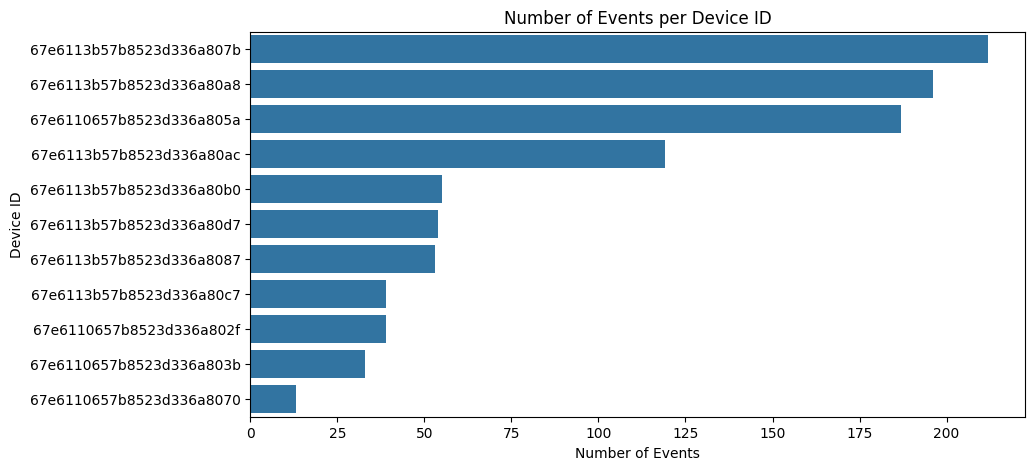

In [125]:
plt.figure(figsize=(10, 5))
sns.countplot(y='device_id', data=df, order=df['device_id'].value_counts().index)
plt.title("Number of Events per Device ID")
plt.xlabel("Number of Events")
plt.ylabel("Device ID")
plt.show()

- **Face Detection Confidence**

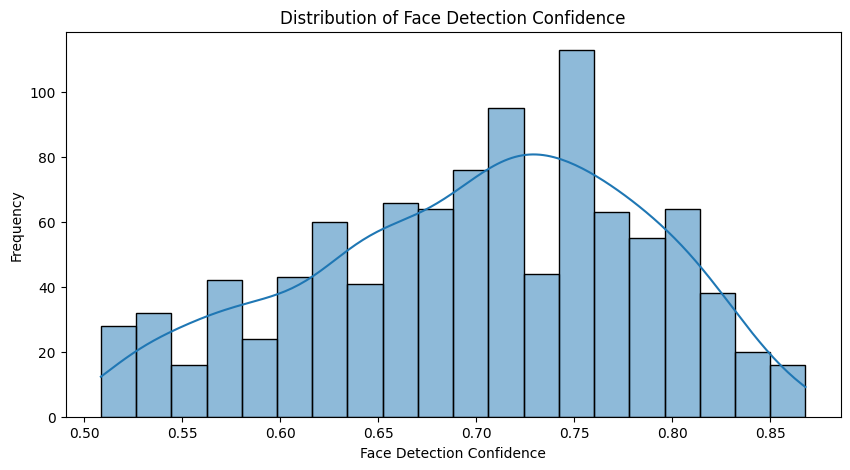

In [126]:
plt.figure(figsize=(10, 5))
sns.histplot(df['face_detect_confidence'], bins=20, kde=True)
plt.title("Distribution of Face Detection Confidence")
plt.xlabel("Face Detection Confidence")
plt.ylabel("Frequency")
plt.show()

- **Count of Faces with and without Mask**

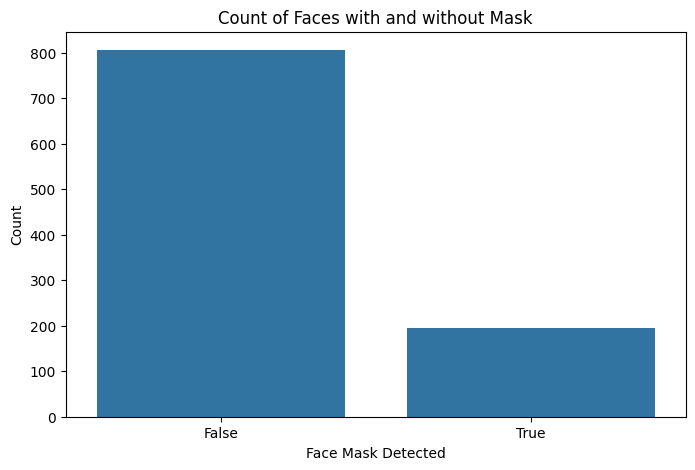

In [127]:
plt.figure(figsize=(8, 5))
sns.countplot(x="face_mask", data=df)
plt.title("Count of Faces with and without Mask")
plt.xlabel("Face Mask Detected")
plt.ylabel("Count")
plt.show()

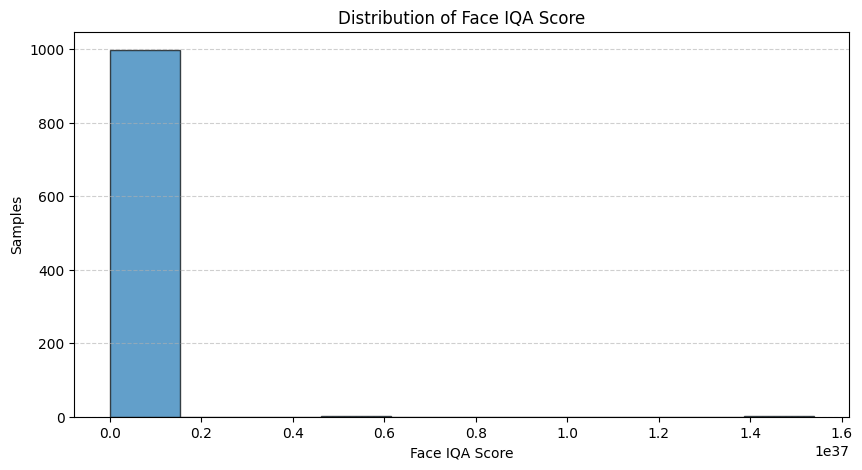

In [128]:
plt.figure(figsize=(10,5))
plt.hist(df['face_iqa_score'], edgecolor="black", alpha=0.7)
plt.title("Distribution of Face IQA Score")
plt.xlabel("Face IQA Score")
plt.ylabel("Samples")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

In [129]:
a = pd.DataFrame(df['face_iqa_score'].describe())
a

,face_iqa_score
count,1.000000e+03
mean,3.593123e+34
std,7.013856e+35
min,-4.818034e+09
25%,4.200000e-45
50%,1.620581e+02
75%,6.315836e+02
max,1.540000e+37


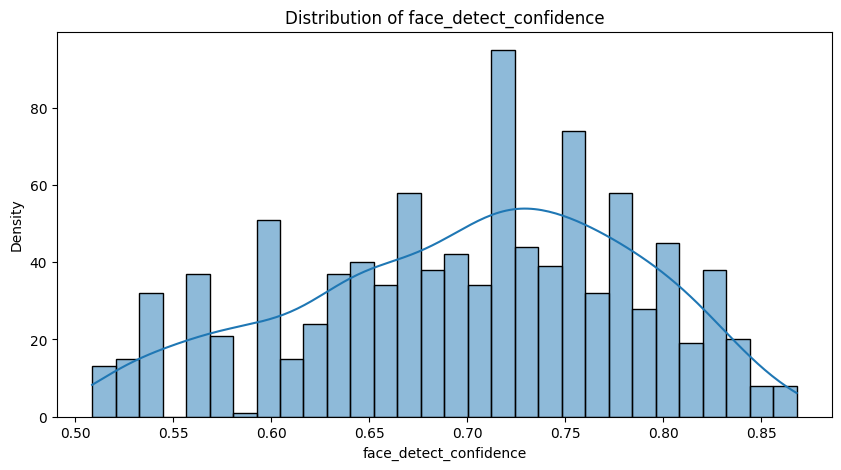

In [130]:
plt.figure(figsize=(10,5))
sns.histplot(df['face_detect_confidence'], bins=30, kde=True)
plt.title("Distribution of face_detect_confidence")
plt.xlabel("face_detect_confidence")
plt.ylabel("Density")
plt.show()

In [131]:
pd.DataFrame(df['face_detect_confidence'].describe())

,face_detect_confidence
count,1000.000000
mean,0.699909
std,0.084583
min,0.508503
25%,0.643782
50%,0.716118
75%,0.770369
max,0.868021


In [132]:
filtered_df = df[df['face_iqa_score'] < 1000].copy()
filtered_df = filtered_df[filtered_df['face_iqa_score'] > -10].copy()
filtered_df['face_iqa_score'].describe()

count    9.220000e+02
mean     2.633530e+02
std      3.086327e+02
min     -4.825745e-01
25%      4.200000e-45
50%      9.914827e-02
75%      5.449061e+02
max      9.897086e+02
Name: face_iqa_score, dtype: float64

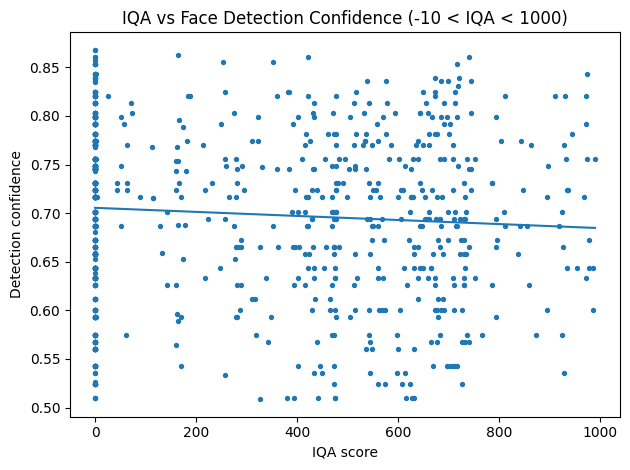

In [133]:
plt.figure()
# plt.scatter(filtered_df['face_iqa_score'], filtered_df['face_detect_confidence'])

x = filtered_df['face_iqa_score'].values
y = filtered_df['face_detect_confidence'].values
a, b = np.polyfit(x, y, 1)
x_line = np.linspace(x.min(), x.max(), 200)
y_line = a * x_line + b

plt.scatter(x, y, s=8)
plt.plot(x_line, y_line)
plt.title("IQA vs Face Detection Confidence (-10 < IQA < 1000)")
plt.xlabel("IQA score")
plt.ylabel("Detection confidence")
plt.tight_layout()
plt.show()

In [134]:
df = df.sort_values("ai_timestamp")

In [135]:
unique_vals = df["ai_timestamp"].value_counts()
print(unique_vals)

ai_timestamp
1.755070e+12    998
1.755080e+12      2
Name: count, dtype: int64


In [ ]:
df/ 

,id,log_timestamp,period,source_timestamp,device_id,object_id,event_id,msg_device_id,msg_event_id,msg_event_time,...,face_additional_info,face_bot_position,face_detect_confidence,face_iqa_score,face_left_position,face_mask,face_right_position,face_top_position,face_track_id,thumbnail_image
0,1,NaT,20250813_1443,NaT,67e6113b57b8523d336a80b0,1799,0fcce7d8-9a53-470a-928c-c1a1cccd25dd,67e6113b57b8523d336a80b0,0fcce7d8-9a53-470a-928c-c1a1cccd25dd,1.755070e+12,...,"[0.36111, 0.525905, 0.118182, 0.854831, 0.0590...",1110,0.658249,1.450000e-41,348,False,405,1062,1799,cam_hybrid/c692e4b8eba240b8add9e3e12cf83793
658,652,NaT,20250813_1455,NaT,67e6113b57b8523d336a80a8,9838,78e5d230-12ed-4446-933c-5d6acb1a31ef,67e6113b57b8523d336a80a8,78e5d230-12ed-4446-933c-5d6acb1a31ef,1.755070e+12,...,"[0.0952018, 0.553266, 0.328282, 0.76862, 0.170...",425,0.773986,4.200000e-45,1000,False,1103,344,9838,cam_hybrid/31e3958c3b1344eb9170cf1dc780e8bb
659,653,NaT,20250813_1455,NaT,67e6110657b8523d336a8070,3319,c2be0467-8578-4b02-bb35-ed324d2c10aa,67e6110657b8523d336a8070,c2be0467-8578-4b02-bb35-ed324d2c10aa,1.755070e+12,...,"[-0.101767, 0.543213, 0.167424, 0.648406, -0.1...",285,0.781219,0.000000e+00,1266,False,1439,146,3319,cam_hybrid/5a5caea37d4b4471ab48515d7e7d87fc
660,655,NaT,20250813_1455,NaT,67e6113b57b8523d336a80a8,9835,452fb57e-9e2b-4d3b-9e6b-eb9938feedd9,67e6113b57b8523d336a80a8,452fb57e-9e2b-4d3b-9e6b-eb9938feedd9,1.755070e+12,...,"[0.0919189, 0.442969, 0.393938, 0.623054, 0.27...",1008,0.860788,4.212448e+02,982,False,1119,900,9835,cam_hybrid/79b90e006f064de3908d9fa424a7222a
661,656,NaT,20250813_1455,NaT,67e6113b57b8523d336a80b0,1879,3cbde500-b70d-4c63-9684-43157b960f5d,67e6113b57b8523d336a80b0,3cbde500-b70d-4c63-9684-43157b960f5d,1.755070e+12,...,"[-0.0558079, 0.53001, -0.144444, 1.00683, -0.1...",863,0.748668,3.387797e-02,493,False,585,777,1879,cam_hybrid/5bd40b3e8e444be08a15dc67b2d9287e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,327,NaT,20250813_1448,NaT,67e6110657b8523d336a805a,7372,008347e9-6e70-48f6-81d0-f176b0e7fcde,67e6110657b8523d336a805a,008347e9-6e70-48f6-81d0-f176b0e7fcde,1.755070e+12,...,"[-0.0755048, 0.569763, 0.0820705, 0.645208, 0....",1893,0.600381,8.949962e+02,559,False,649,1838,7372,cam_hybrid/c94e8693ed4540f894121a6bd463cd49
334,332,NaT,20250813_1448,NaT,67e6110657b8523d336a805a,7369,41a3cf23-72a5-426a-b4ce-08050afd8fbc,67e6110657b8523d336a805a,41a3cf23-72a5-426a-b4ce-08050afd8fbc,1.755070e+12,...,"[0.0820705, 0.666578, -0.59419, 0.950065, 0.07...",1493,0.524429,0.000000e+00,601,False,684,1430,7369,cam_hybrid/d1379ee3ea394fb8939af6e05b173db6
999,986,2025-08-22 01:00:00,20250813_1501,2025-08-22 01:00:00,67e6110657b8523d336a805a,7528,c3f66770-c2da-47ae-81d4-1d21c9c9ba42,67e6110657b8523d336a805a,c3f66770-c2da-47ae-81d4-1d21c9c9ba42,1.755070e+12,...,"[0.699241, 0.575833, 0.525251, 0.502038, -0.19...",2380,0.716118,4.200000e-45,585,False,656,2330,7528,cam_hybrid/e9feb68e09ee4bc9b98a558a8c03848e
528,5390,2025-08-22 12:52:36,20250813_1612,2025-08-22 12:52:36,67e6113b57b8523d336a807b,32,d031e933-a21e-421b-bdc5-e8704d12ec51,67e6113b57b8523d336a807b,d031e933-a21e-421b-bdc5-e8704d12ec51,1.755080e+12,...,"[-0.0787876, 0.924715, 0.600756, 1.3593, -0.08...",1038,0.593148,0.000000e+00,548,False,629,977,32,cam_hybrid/d5bb6ddb31cf4e12a3361ded417fa2ca
